## An Examination of Bias and Fairness in Data Science Job Change Predictor

### Author: Claire Saint-Donat, Xiangyue Wang

For our final project, we wish to examine an Automated Decision System (ADS), developed by the Kaggle user Josh, that predicts whether data scientists will seek new jobs. Using a set of features about a given data scientist, the ADS categorizes them as either “job seeker” or “non-job seeker”. The ADS, published on Kaggle, consists of data-preprocessing, data exploration, and model-fitting that utilizes SVM, decision trees, random forests, logistic regression, and KNN. Our aim is to design a nutritional label for the ADS that examines the bias in the data, the processing, and one ML model used in this ADS. 


## Set Up Environment & Load the Data

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

aug_train = pd.read_csv('aug_train.csv')
aug_test = pd.read_csv('aug_test.csv')
aug_train.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


### Explore Datatypes

In [5]:
aug_train.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

### Explore Missing Data 

In [14]:
aug_train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

### Explore Column Distributions

In [3]:
aug_train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [19]:
aug_train['target'].groupby(aug_train['gender']).mean()

gender
Female    0.263328
Male      0.227819
Other     0.261780
Name: target, dtype: float64

In [20]:
aug_train['target'].groupby(aug_train['education_level']).mean()

education_level
Graduate          0.279790
High School       0.195340
Masters           0.214400
Phd               0.140097
Primary School    0.133117
Name: target, dtype: float64

In [21]:
aug_train['target'].groupby(aug_train['experience']).mean()

experience
1      0.424408
10     0.210152
11     0.227410
12     0.186235
13     0.192982
14     0.182594
15     0.166181
16     0.141732
17     0.166667
18     0.153571
19     0.174342
2      0.331854
20     0.222973
3      0.353028
4      0.325731
5      0.288112
6      0.282072
7      0.294747
8      0.243142
9      0.217347
<1     0.454023
>20    0.153074
Name: target, dtype: float64

In [35]:
# Get one hot encoding of gender
one_hot = pd.get_dummies(aug_train['gender'])
# Join the encoded df
#aug_train = aug_train.join(one_hot)
aug_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Female,Male,Other
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,0,1,0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,0,1,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,0,0,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,0,0,0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,0,1,0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,0,1,0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,0,1,0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,0,1,0


In [32]:
corr = aug_train.corr()

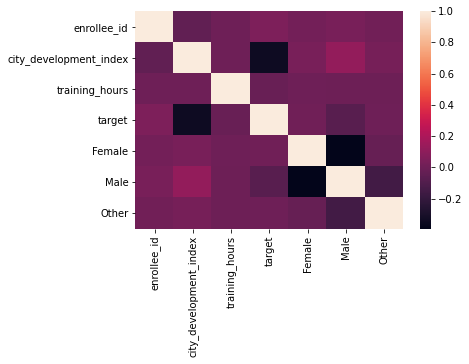

In [34]:
sns.heatmap(corr)